In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from matplotlib.dates import MonthLocator, DateFormatter, YearLocator
from dateutil.relativedelta import relativedelta

In [73]:
def hist_neu_events(delta):
    data = pd.read_csv('IceCube_Gold_Bronze_Tracks.csv')
    datetime_strings = np.array(data['START'])
    # Cuts off the minute, second, and nanosecond from the datetime strings
    date_strings = [datetime.strptime(dt_str, '%Y-%m-%d %H:%M:%S.%f').strftime('%Y-%m-%d') for dt_str in datetime_strings]
    dates = [datetime.strptime(date, '%Y-%m-%d') for date in date_strings]
    # Makes sure the bins start at January or July depending on the first date
    if min(dates).month < 6:
        start_date_bin = min(dates).replace(month=1)
    else:
        start_date_bin = min(dates).replace(month=7)
    # delta is the number of months in each bin
    end_date_bin = max(dates)+ relativedelta(months=+delta)
    # Creates bins by adding delta months each time
    bin_edges = np.arange(np.datetime64(start_date_bin), end_date_bin,  np.timedelta64(delta, 'M'),   dtype='datetime64[M]')
    # Creates the plot
    plt.figure(figsize=(10, 6))
    n = plt.hist(dates, bins=bin_edges, histtype = 'step', linewidth = 3)
    plt.axhline(np.median(n[0]),linewidth = 3, linestyle = '--',color = 'red', label = 'Median')
    plt.gca().xaxis.set_major_locator(MonthLocator(bymonth=(1, 13)))
    plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))
    plt.xticks(rotation=90)
    plt.title(f'Realtime Neutrino Events (Binned in {delta} Months)',fontsize = 20)
    plt.xlabel('Gregorian Calander Dates',fontsize = 20)
    plt.ylabel('Number of Events',fontsize = 20)
    plt.yticks(fontsize = 16);
    plt.xticks(fontsize = 16);
    plt.legend(fontsize = 16)

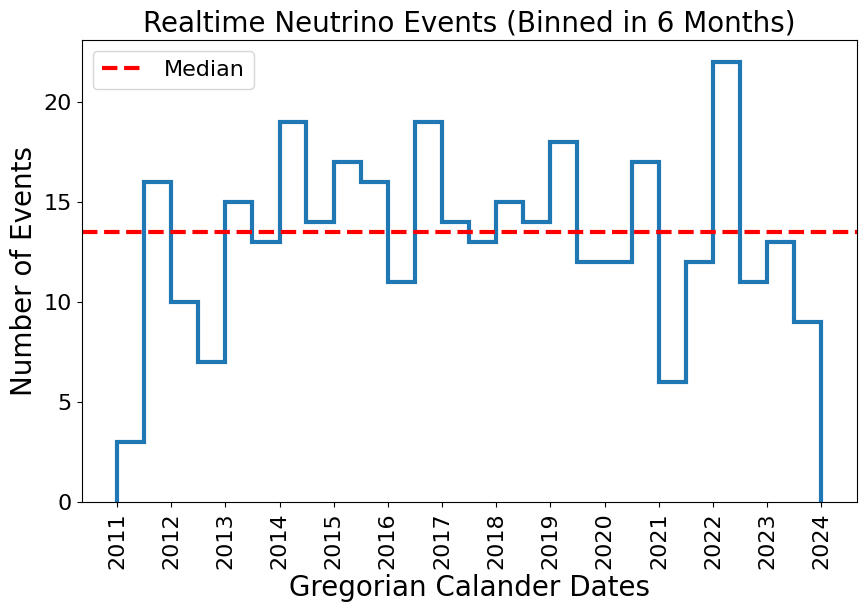

In [82]:
hist_neu_events(delta = 6)